In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import signal

(array([ 0.        ,  0.19669037, -0.20908235]), array([[ 0.        ,  0.99865468,  0.99874439],
       [ 1.        , -0.050879  , -0.04903605],
       [ 0.        , -0.01000741,  0.01025257]]))
100


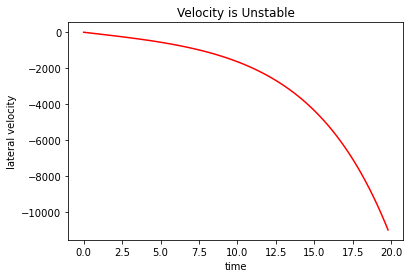

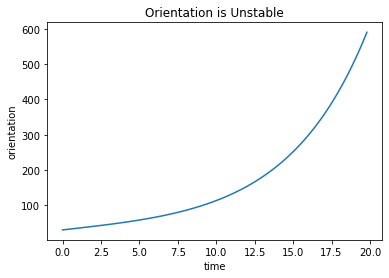

Text(0.5, 1.0, 'Angular Velocity is Unstable')

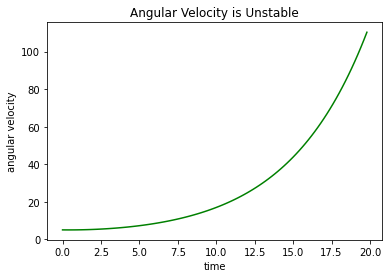

In [56]:
#define a function to implement the forward euler method
def forward_euler(n, T, x0, M):
    h = (T)/n
    x = np.zeros((n, 3))
    tn = np.zeros(n)
    
    #changing the values of u and tn
    for i in range (n):
        
        #if i = 0 then we have u[0] = y0
        if i == 0:
            x[i] = x0
            
        #else follow the definition in the lecture notes
        else:
            x[i] = x[i-1] + h*np.matmul(M, x[i-1])
        
        tn[i] = h*i
        
    #need to return both tn and u so they can be plotted against one another
    return tn, x

x_0 = np.array([10, 30, 5])
M = np.array([[-3/800, 0, -80009/4000], [0, 0, 1], [-1/486, 0, -7/810]])
print(np.linalg.eig(M))

t, fe = forward_euler(100, 20, x_0, M)

print(fe.shape[0])

v = []
for i in range(fe.shape[0]):
    v.append(fe[i][0])
    
phi = []
for i in range(fe.shape[0]):
    phi.append(fe[i][1])
    
ang_v = []
for i in range(fe.shape[0]):
    ang_v.append(fe[i][2])

plt.plot(t, v, color = 'r', label = 'lateral velocity')
plt.xlabel('time')
plt.ylabel('lateral velocity')
plt.title('Velocity is Unstable')
plt.show()
plt.plot(t, phi, label = 'orientation')
plt.xlabel('time')
plt.ylabel('orientation')
plt.title('Orientation is Unstable')
plt.show()
plt.plot(t, ang_v, color = 'g', label = 'angular velocity')
plt.xlabel('time')
plt.ylabel('angular velocity')
plt.title('Angular Velocity is Unstable')

In [57]:
N = np.array([[1/20], [0], [20/243]])
R = np.array([[1]])
Q = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

P = linalg.solve_continuous_are(M, N, Q, R)
print(P)

[[  20.06975455  379.53154849  -24.02439668]
 [ 379.53154849 7612.40551363 -218.41541571]
 [ -24.02439668 -218.41541571  291.71370334]]


In [58]:
N_T = np.array([1/20, 0, 20/243])

K = np.matmul(N_T, P)
print(K)

#calculating NK to be the 3x3 matrix
NK = [[], [], []]
for i in range (3):
    for j in range(3):
        NK[i].append(N[0][0]*K[j])
        
print(NK)


[-0.97382887  1.         22.80813847]
[[-0.048691443570859416, 0.04999999999093899, 1.140406923278399], [-0.048691443570859416, 0.04999999999093899, 1.140406923278399], [-0.048691443570859416, 0.04999999999093899, 1.140406923278399]]


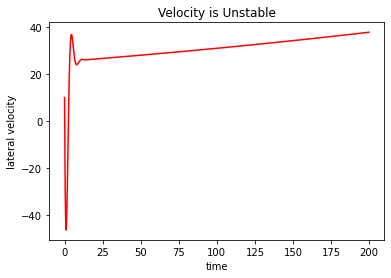

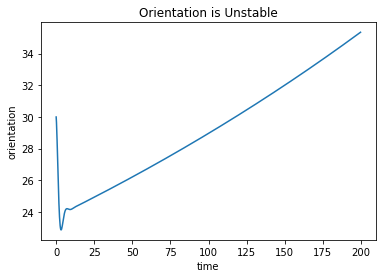

Text(0.5, 1.0, 'Angular Velocity is Stable')

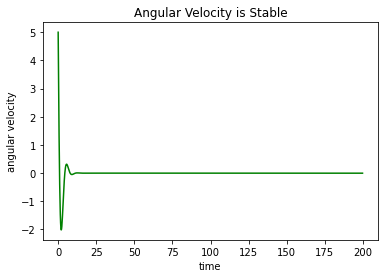

In [59]:
def forward_euler2(n, T, x0, M, NK):
    h = (T)/n
    x = np.zeros((n, 3))
    tn = np.zeros(n)
    
    #changing the values of u and tn
    for i in range (n):
        
        #if i = 0 then we have u[0] = y0
        if i == 0:
            x[i] = x0
            
        #else follow the definition in the lecture notes
        else:
            x[i] = x[i-1] + h*(np.matmul(M - NK, x[i-1] ))
        
        tn[i] = h*i
        
    #need to return both tn and u so they can be plotted against one another
    return tn, x


t2, fe2 = forward_euler2(1000, 200, x_0, M, NK)

v2 = []
for i in range(fe2.shape[0]):
    v2.append(fe2[i][0])
    
phi2 = []
for i in range(fe2.shape[0]):
    phi2.append(fe2[i][1])
    
ang_v2 = []
for i in range(fe2.shape[0]):
    ang_v2.append(fe2[i][2])

plt.plot(t2, v2, color = 'r', label = 'lateral velocity')
plt.xlabel('time')
plt.ylabel('lateral velocity')
plt.title('Velocity is Unstable')
plt.show()
plt.plot(t2, phi2, label = 'orientation')
plt.xlabel('time')
plt.ylabel('orientation')
plt.title('Orientation is Unstable')
plt.show()
plt.plot(t2, ang_v2, color = 'g', label = 'angular velocity')
plt.xlabel('time')
plt.ylabel('angular velocity')
plt.title('Angular Velocity is Stable')

In [88]:
M = np.array([[-3/800, 0, -80009/4000], [0, 0, 1], [-1/486, 0, -7/810]])
N = np.array([[1/20], [0], [20/243]])
pole = [-1,-2,-3]
K = scipy.signal.place_poles(M, N, pole, method = 'YT')
P = K.gain_matrix
print(P)
print(N)

[[ 1451.40910556 29160.00000038  -808.98159413]]
[[0.05      ]
 [0.        ]
 [0.08230453]]


In [89]:
NP = [[], [], []]

for i in range (3):
    for j in range (3):
        NP[i].append(N[i][0]*P[0][j])
        
NP = np.array(NP)
print('NP is', NP)

A = M - NP

print('A is', A)

NP is [[  72.57045528 1458.00000002  -40.44907971]
 [   0.            0.           -0.        ]
 [ 119.45753955 2400.00000003  -66.58284725]]
A is [[-7.25742053e+01 -1.45800000e+03  2.04468297e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-1.19459597e+02 -2.40000000e+03  6.65742053e+01]]


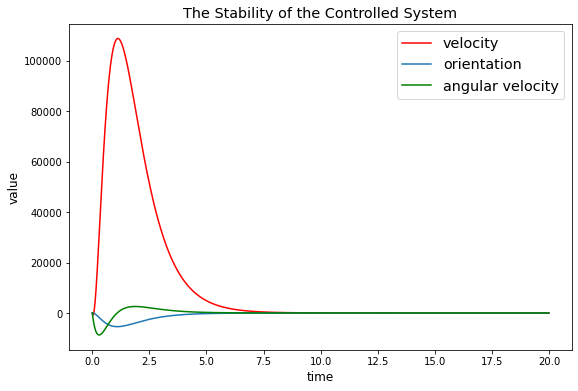

In [91]:
dt = 0.01

t = np.arange(0, 20, dt)

y = [10, 30, 5]

Y = np.zeros((3, len(t)))
   
Y[:, 0] = y


for i in range (1, len(t)):
    y = y + dt*np.matmul(A, y)

    Y[:,i] = y
    

plt.figure(figsize=(9,6))
plt.plot(t, Y[0,:], color = 'r', label = 'velocity')
plt.plot(t, Y[1,:], label = 'orientation')
plt.plot(t, Y[2,:], color = 'g', label = 'angular velocity')
plt.legend(fontsize = 'x-large')
plt.xlabel('time', fontsize = 'large')
plt.ylabel('value', fontsize = 'large')
plt.title('The Stability of the Controlled System', fontsize = 'x-large')
plt.show()

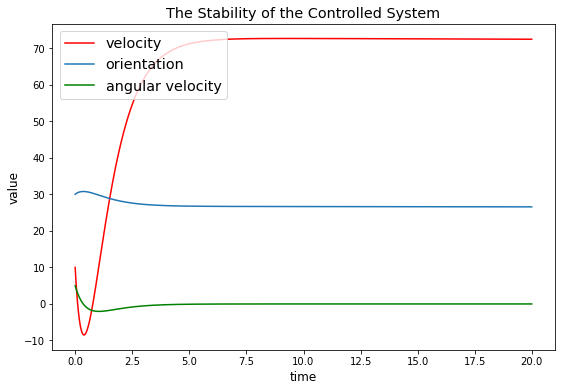

In [92]:
pole2 = [-1,-2,-0.0003]
K1 = scipy.signal.place_poles(M, N, pole2, method = 'YT')
P1 = K1.gain_matrix

NP1 = [[], [], []]

for i in range (3):
    for j in range (3):
        NP1[i].append(N[i][0]*P1[0][j])
        
NP1 = np.array(NP1)

A1 = M - NP1

y1 = [10, 30, 5]

Y1 = np.zeros((3, len(t)))

Y1[:, 0] = y1


for i in range (1, len(t)):
    y1 = y1 + dt*np.matmul(A1, y1)
    Y1[:,i] = y1

#print(X[2,:]==Y[2,:])

plt.figure(figsize=(9,6))
plt.plot(t, Y1[0,:], color = 'r', label = 'velocity')
plt.plot(t, Y1[1,:], label = 'orientation')
plt.plot(t, Y1[2,:], color = 'g', label = 'angular velocity')
plt.legend(fontsize = 'x-large')
plt.xlabel('time', fontsize = 'large')
plt.ylabel('value', fontsize = 'large')
plt.title('The Stability of the Controlled System', fontsize = 'x-large')
plt.show()